In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('../../Dataset/Non_Outlier/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
54591,1.0,0.107692,1.0,0.346154,1.0,0.0,0.0,0.442084,0.932099,0.401384,0
134239,1.0,0.061538,1.0,0.538462,0.0,0.0,1.0,0.505940,0.932099,0.442907,0
95655,1.0,0.061538,1.0,0.269231,1.0,1.0,0.0,0.330859,0.932099,0.529412,0
228279,1.0,0.000000,1.0,0.288462,0.0,0.0,0.0,0.407527,0.981481,0.363322,0
170025,0.0,0.215385,1.0,0.538462,1.0,1.0,0.0,0.674586,0.759259,0.595156,0


In [8]:
df_test = pd.read_csv('../../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
26497,0,0.353846,1,0.538462,0,1,1,0.147564,0.154321,0.972318,0
25987,1,0.153846,1,0.788462,1,0,0,0.053249,0.932099,0.871972,0
21170,1,0.076923,1,0.038462,0,0,1,0.052397,0.932099,0.505190,0
43143,1,0.800000,1,0.346154,0,1,1,0.076425,0.802469,0.048443,0
29595,0,0.646154,1,0.538462,0,1,1,0.072148,0.154321,0.906574,0


0    202945
1     27686
Name: Tertarik, dtype: int64


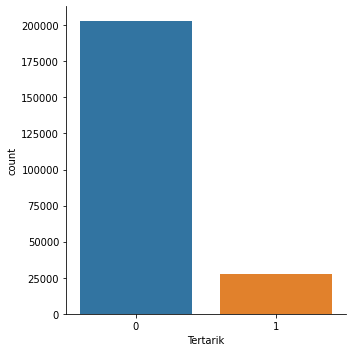

In [9]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [10]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_val.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_val.shape}')


x_train shape: (184504, 10)
x_test shape: (46127, 10)
---------------------------------
y_train shape: (184504,)
y_test shape: (46127,)


## **Tuning Model**

In [12]:
classifier = [
    DecisionTreeClassifier(class_weight='balanced'),
    SGDClassifier(class_weight='balanced'),
    GaussianNB(),
    AdaBoostClassifier(),
    RandomForestClassifier(class_weight='balanced'),
]

name = [
    'Decision Tree',
    'SGDClassifier',
    'Naive Bayes',
    'AdaBoost',
    'Random Forest',
]

### **Melatih Model Machine Learning**

In [13]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)

In [14]:
def report(model, title, x_test, y_test):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    f1 = f1_score(y_test, result)
    recall = recall_score(y_test, result)
    precision = precision_score(y_test, result)
    roc = roc_auc_score(y_test, result)
    accuracy = accuracy_score(y_test, result)

    print("F1-Score \t:", f1)
    print("Recall \t\t:", recall)
    print("Precision \t:", precision)
    print("ROC-AUC \t:", roc)
    print("Accuracy \t:", accuracy, end="\n\n")

    return title, f1, recall, precision, roc, accuracy


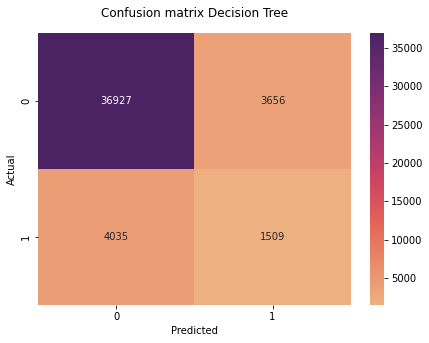

F1-Score 	: 0.2818190307218228
Recall 		: 0.2721861471861472
Precision 	: 0.2921587608906099
ROC-AUC 	: 0.5910495824761035
Accuracy 	: 0.8332646822901988



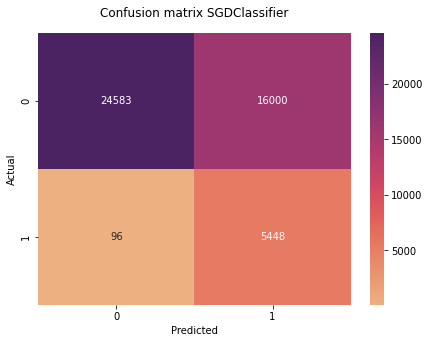

F1-Score 	: 0.4036751630112626
Recall 		: 0.9826839826839827
Precision 	: 0.25400969787392763
ROC-AUC 	: 0.794215115556564
Accuracy 	: 0.6510503609599584



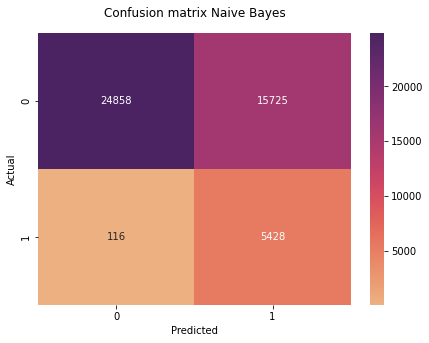

F1-Score 	: 0.40663744990073786
Recall 		: 0.9790764790764791
Precision 	: 0.2566066279014797
ROC-AUC 	: 0.7957994819303742
Accuracy 	: 0.6565785765386867



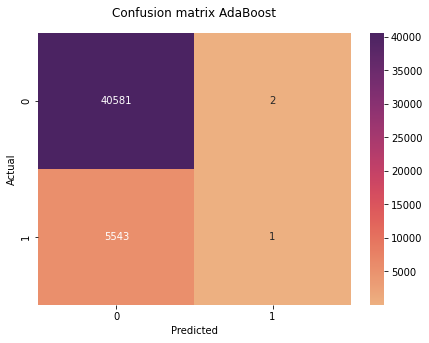

F1-Score 	: 0.000360555255092843
Recall 		: 0.00018037518037518038
Precision 	: 0.3333333333333333
ROC-AUC 	: 0.5000655467307145
Accuracy 	: 0.8797884102586337



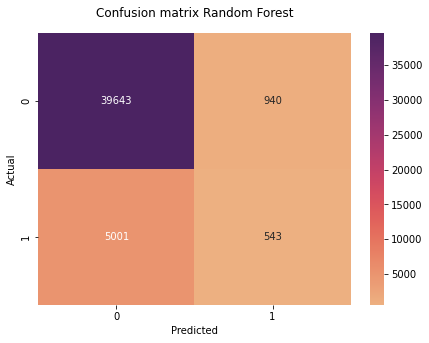

F1-Score 	: 0.15454674825672407
Recall 		: 0.09794372294372294
Precision 	: 0.366149696561025
ROC-AUC 	: 0.5373906575194676
Accuracy 	: 0.8712034166540205



In [15]:
metrics_report = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_val, y_val)
    metrics_report.append([title, f1, recall, precision, roc, accuracy])

In [16]:
metrics_report = pd.DataFrame(metrics_report, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
2,Naive Bayes,0.406637,0.979076,0.256607,0.795799,0.656579
1,SGDClassifier,0.403675,0.982684,0.254010,0.794215,0.651050
0,Decision Tree,0.281819,0.272186,0.292159,0.591050,0.833265
4,Random Forest,0.154547,0.097944,0.366150,0.537391,0.871203
3,AdaBoost,0.000361,0.000180,0.333333,0.500066,0.879788


## **Memprediksi Dan Evaluasi Data Test**

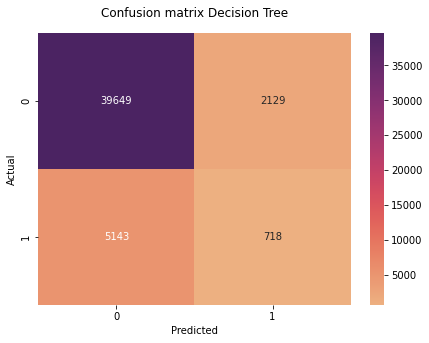

F1-Score 	: 0.1649058337161231
Recall 		: 0.12250469203207644
Precision 	: 0.2521952932911837
ROC-AUC 	: 0.5357724283560258
Accuracy 	: 0.8473519595289574



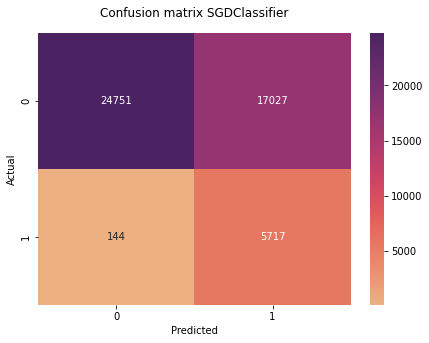

F1-Score 	: 0.39972032861387874
Recall 		: 0.9754308138542911
Precision 	: 0.25136299683432994
ROC-AUC 	: 0.7839359057542793
Accuracy 	: 0.6395600243497974



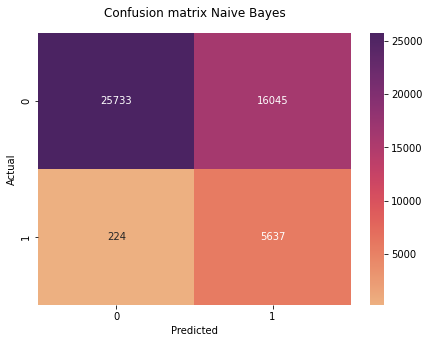

F1-Score 	: 0.409323603093345
Recall 		: 0.9617812659955639
Precision 	: 0.25998524121391015
ROC-AUC 	: 0.7888637288855698
Accuracy 	: 0.6584940909758811



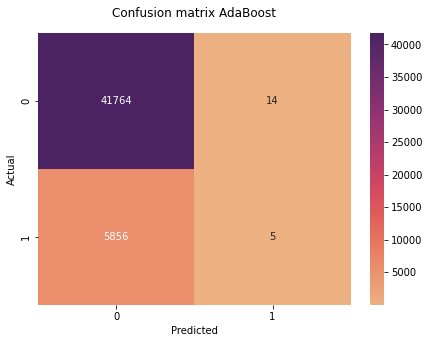

F1-Score 	: 0.0017006802721088435
Recall 		: 0.0008530967411704487
Precision 	: 0.2631578947368421
ROC-AUC 	: 0.5002589960703314
Accuracy 	: 0.8767816284976595



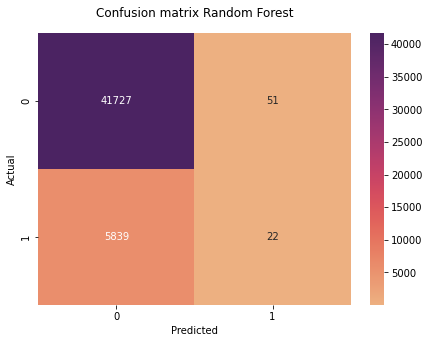

F1-Score 	: 0.00741489720256151
Recall 		: 0.003753625661149974
Precision 	: 0.3013698630136986
ROC-AUC 	: 0.5012664437367935
Accuracy 	: 0.8763618044039547



In [17]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

metrics_report_test = []

for models, i in zip(classifier, name):
    title, f1, recall, precision, roc, accuracy = report(models, i, x_test, y_test)
    metrics_report_test.append([title, f1, recall, precision, roc, accuracy])

In [18]:
metrics_report_test = pd.DataFrame(metrics_report_test, columns=['Model', 'F1-Score', 'Recall', 'Precision', 'ROC-AUC', 'Accuracy'])
metrics_report_test.sort_values(by=['ROC-AUC'], ascending=False)

,Model,F1-Score,Recall,Precision,ROC-AUC,Accuracy
2,Naive Bayes,0.409324,0.961781,0.259985,0.788864,0.658494
1,SGDClassifier,0.399720,0.975431,0.251363,0.783936,0.639560
0,Decision Tree,0.164906,0.122505,0.252195,0.535772,0.847352
4,Random Forest,0.007415,0.003754,0.301370,0.501266,0.876362
3,AdaBoost,0.001701,0.000853,0.263158,0.500259,0.876782
